In [56]:
import pickle
with open("train_data.txt", "rb") as myFile:
    data = pickle.load(myFile)

In [57]:
data=data[1:]

In [58]:
x_values=[w[0] for w in data[1:]]
y_values=[w[1] for w in data[1:]]
z_values=[w[2] for w in data[1:]]

In [59]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

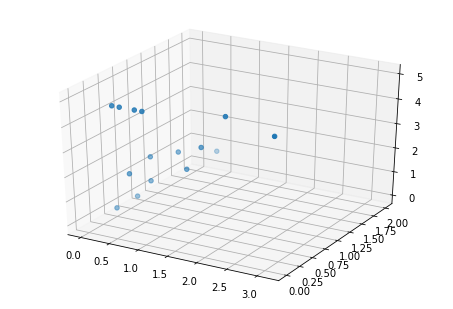

In [60]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x_values, y_values,z_values)

In [61]:
%matplotlib inline

data

[(1.625, 0.0, 5),
 (0.5, 0.25, 2.0),
 (0.625, 1.0, 2.0),
 (0.5, 0.0, 5),
 (1.125, 0.625, 2.0),
 (1.375, 0.625, 3.0),
 (0.375, 0.75, 1.0),
 (0.875, 0.0, 5),
 (0.0, 0.5, 0.0),
 (2.125, 0.25, 5),
 (1.0, 0.0, 5),
 (3.125, 0.0, 5),
 (0.375, 0.75, 2.0),
 (0.625, 0.0, 5),
 (0.0, 0.875, 0.0),
 (0.375, 2.0, 0.6666666666666666)]

In [62]:
import math
def distance(n,p1,p2):
    sum=0
    for i in range(n):
        sum+=math.pow(p1[i]-p2[i],2)
    return math.sqrt(sum)
def centroid(cluster):
    import operator
    
    sum=(0,0,0)
    for i in range(len(cluster)):
        sum=tuple(map(operator.add, sum, data[cluster[i]-1]))
    sum=list(sum)
    for i in range(len(sum)):
        sum[i]/=len(cluster)
    
    return tuple(sum)

In [67]:
k=3
from random import randint
c=[]
c_new=[]
clusters=[]
for i in range(k):
    c.append(None)
    c_new.append(None)
    c[i]=data[randint(0, len(data)-1)]
    clusters.append([])
print(c)
iteration=1
while(True):
    print("\n",iteration,":")
    for i in range(len(data)):
        pos=None
        min_dist=9999
        for j in range(k):
            dist=distance(3,c[j],data[i])
            if dist<min_dist:
                min_dist=dist
                pos=j
        clusters[pos].append(i+1)
    flag=0
    for i in range(k):
        c_new[i]=centroid(clusters[i])
        print(c_new[i],c[i])
        if( all(j == k for j, k in zip(c_new[i],c[i])))== False:
            flag=1
    print (clusters)
    if flag==0:
        break
    else:
        for i in range(k):
            clusters[i]=[]
            c[i]=c_new[i]
    
    iteration+=1
    if iteration==10:
        break
    

[(0.625, 0.0, 5), (0.625, 1.0, 2.0), (0.0, 0.875, 0.0)]

 1 :
(1.4107142857142858, 0.03571428571428571, 5.0) (0.625, 0.0, 5)
(0.7291666666666666, 0.6666666666666666, 2.0) (0.625, 1.0, 2.0)
(0.125, 1.125, 0.2222222222222222) (0.0, 0.875, 0.0)
[[1, 4, 8, 10, 11, 12, 14], [2, 3, 5, 6, 7, 13], [9, 15, 16]]

 2 :
(1.4107142857142858, 0.03571428571428571, 5.0) (1.4107142857142858, 0.03571428571428571, 5.0)
(0.8, 0.65, 2.2) (0.7291666666666666, 0.6666666666666666, 2.0)
(0.1875, 1.03125, 0.41666666666666663) (0.125, 1.125, 0.2222222222222222)
[[1, 4, 8, 10, 11, 12, 14], [2, 3, 5, 6, 13], [7, 9, 15, 16]]

 3 :
(1.4107142857142858, 0.03571428571428571, 5.0) (1.4107142857142858, 0.03571428571428571, 5.0)
(0.8, 0.65, 2.2) (0.8, 0.65, 2.2)
(0.1875, 1.03125, 0.41666666666666663) (0.1875, 1.03125, 0.41666666666666663)
[[1, 4, 8, 10, 11, 12, 14], [2, 3, 5, 6, 13], [7, 9, 15, 16]]


1 1.625 0.0 5 #0000FF
4 0.5 0.0 5 #0000FF
8 0.875 0.0 5 #0000FF
10 2.125 0.25 5 #0000FF
11 1.0 0.0 5 #0000FF
12 3.125 0.0 5 #0000FF
14 0.625 0.0 5 #0000FF
2 0.5 0.25 2.0 #00FF00
3 0.625 1.0 2.0 #00FF00
5 1.125 0.625 2.0 #00FF00
6 1.375 0.625 3.0 #00FF00
13 0.375 0.75 2.0 #00FF00
7 0.375 0.75 1.0 #FF0066
9 0.0 0.5 0.0 #FF0066
15 0.0 0.875 0.0 #FF0066
16 0.375 2.0 0.6666666666666666 #FF0066


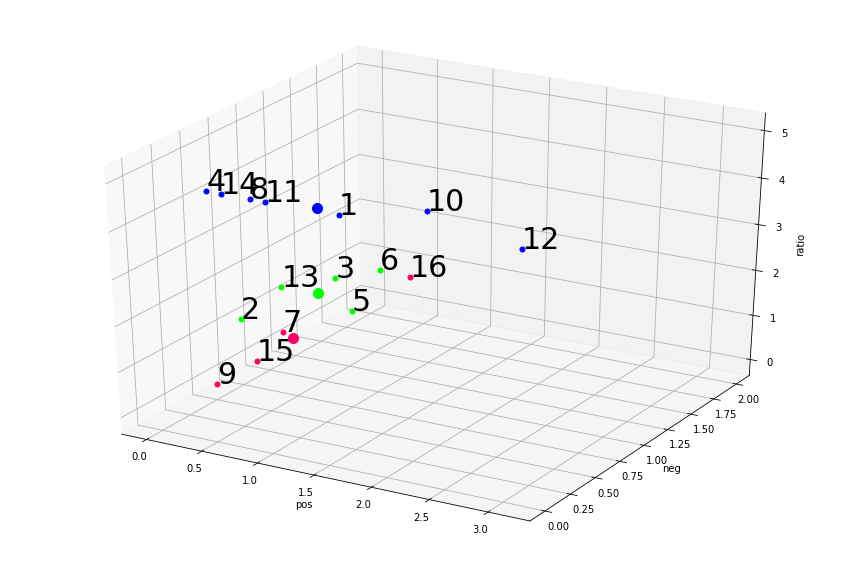

In [68]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
colors=["#0000FF", "#00FF00", "#FF0066"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    #colors.append("%03x" % random.randint(0, 0xFFF))
    ax.scatter(c[i][0],c[i][1],c[i][2],color=colors[i],s=100)
    for j in clusters[i]:
        print(j,data[j-1][0],data[j-1][1],data[j-1][2],colors[i])
        
        ax.scatter(data[j-1][0],data[j-1][1],data[j-1][2],color=colors[i],s=25)
        ax.text(data[j-1][0],data[j-1][1],data[j-1][2],  '%s' % (str(j)), size=30, zorder=1)
ax.set_xlabel('pos')
ax.set_ylabel('neg')
ax.set_zlabel('ratio')
plt.show()


In [69]:
test_set={}
train_set={}

def reassign(i,cluster_class):
    for j in clusters[i]:
        train_set[j]=cluster_class
def label_clusters():
    accuracy=0
    import csv
    
    with open("kmeans_test.csv") as csv_file:
        reader=csv.reader(csv_file)
        next(reader)
        for row in reader:
            test_set[int(row[0])]=row[2]
   
    g_count=b_count=n_count=0
    
    for i in range(k):
        for j in clusters[i]:
            print(j)
            if j in test_set:
                if test_set[j]=='g':
                    g_count+=1
                elif test_set[j]=='b':
                    b_count+=1
                elif test_set[j]=='n':
                    n_count+=1
        if(b_count== max(g_count,b_count,n_count)):
            reassign(i,'b')
        elif(g_count== max(g_count,b_count,n_count)):
            reassign(i,'g')
        elif(n_count== max(g_count,b_count,n_count)):
            reassign(i,'n')
                    
            
    
    print(test_set)    
    print(train_set)

label_clusters()

1
4
8
10
11
12
14
2
3
5
6
13
7
9
15
16
{1: 'g', 2: 'g', 3: 'b', 4: 'n', 5: 'g', 6: 'b', 7: 'b', 8: 'g', 9: 'b', 10: 'n'}
{1: 'g', 4: 'g', 8: 'g', 10: 'g', 11: 'g', 12: 'g', 14: 'g', 2: 'g', 3: 'g', 5: 'g', 6: 'g', 13: 'g', 7: 'g', 9: 'g', 15: 'g', 16: 'g'}


In [71]:
def accuracy():
    total=len(test_set)
    correct=0
    for i in train_set:
        if i in test_set and train_set[i]==test_set[i]:
            correct+=1
    print(float(correct/total)*100,'%')
accuracy()

40.0 %
